In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
zafarali27_house_price_prediction_dataset_path = kagglehub.dataset_download('zafarali27/house-price-prediction-dataset')

print('Data source import complete.')


100%|██████████| 28.7k/28.7k [00:00<00:00, 36.1MB/s]

Extracting files...
Data source import complete.


In [2]:
# %% [code]
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# %% [code]


In [22]:
data=pd.read_csv("/content/hpdata.csv")
data.head()
data=data[['Area','Bedrooms','Floors','Price']]
data.head()
print(data.columns)
x = data[['Area','Bedrooms','Floors']].values
y = data['Price'].values
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
data.head()
print(x[:5])

Index(['Area', 'Bedrooms', 'Floors', 'Price'], dtype='object')
[[-1.10147065  1.40179052  1.24415065]
 [ 1.14748543  1.40179052  1.24415065]
 [ 0.62231712 -0.70458141  1.24415065]
 [-1.40575935  0.69966655  0.00803475]
 [ 1.65257379 -1.40670539  0.00803475]]


Epoch     0 Cost=0.500000 θ0=0.000000 thetas=[ 1.54212032e-06 -3.47050317e-06  5.58902597e-05]
Epoch  1000 Cost=0.498642 θ0=0.000000 thetas=[ 0.00075925 -0.00236628  0.03536427]
Epoch  2000 Cost=0.498459 θ0=0.000000 thetas=[ 0.00085194 -0.00337952  0.04835355]
Epoch  3000 Cost=0.498434 θ0=0.000000 thetas=[ 0.00082005 -0.00380204  0.05313378]
Epoch  4000 Cost=0.498430 θ0=0.000000 thetas=[ 0.00078489 -0.00397464  0.05489358]
Epoch  5000 Cost=0.498430 θ0=0.000000 thetas=[ 0.00076361 -0.00404406  0.05554165]
Epoch  6000 Cost=0.498430 θ0=0.000000 thetas=[ 0.00075281 -0.00407163  0.05578039]
Epoch  7000 Cost=0.498430 θ0=0.000000 thetas=[ 0.00074778 -0.00408247  0.05586836]
Epoch  8000 Cost=0.498430 θ0=0.000000 thetas=[ 0.00074555 -0.0040867   0.05590078]
Epoch  9000 Cost=0.498430 θ0=0.000000 thetas=[ 0.0007446  -0.00408834  0.05591274]


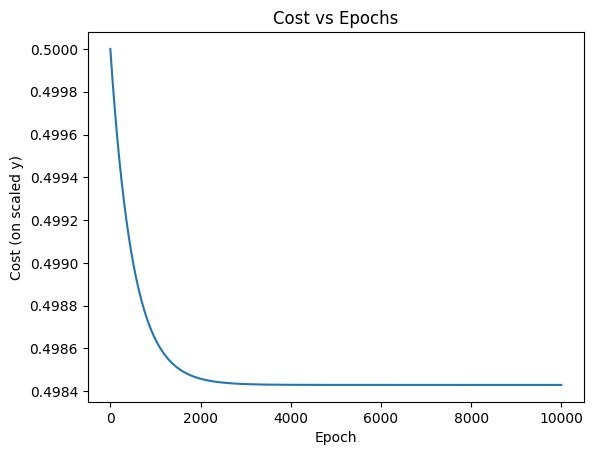

Intercept (original scale): 537676.855
Coefficients (original scale): [  205.66585865 -1130.02625413 15453.24744784]


In [26]:
m = len(y)

# STANDARDIZE features (if not already)
x_mean = np.mean(x, axis=0)
x_std  = np.std(x, axis=0)
X = (x - x_mean) / x_std

# STANDARDIZE target (important)
y_mean = np.mean(y)
y_std  = np.std(y)
Y = (y - y_mean) / y_std   # use Y for training

# initialize parameters
theta0 = 0.0
theta = np.zeros(X.shape[1])

# try smaller learning rate
alpha = 1e-3      # start here, if diverging -> try 1e-4 or 1e-5
epochs = 10000

cost_history = []

for epoch in range(epochs):
    y_pred = theta0 + np.dot(X, theta)     # (m,)
    error = y_pred - Y                     # (m,)

    grad0 = (1/m) * np.sum(error)
    grad  = (1/m) * np.dot(X.T, error)

    theta0 -= alpha * grad0
    theta  -= alpha * grad

    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} Cost={cost:.6f} θ0={theta0:.6f} thetas={theta}")

# Plot cost history (should go down)
plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost (on scaled y)')
plt.title('Cost vs Epochs')
plt.show()

# To make predictions on original scale:
def predict_original_scale(x_new):
    # x_new is raw-feature vector(s)
    x_new_scaled = (x_new - x_mean) / x_std
    y_new_scaled = theta0 + np.dot(x_new_scaled, theta)
    y_new = y_new_scaled * y_std + y_mean
    return y_new

# Final denormalized parameters (for interpretation) - optional:
# Note: converting theta back to original-scale intercept and coefs
coef_orig = theta * (y_std / x_std)
intercept_orig = (theta0 * y_std) + y_mean - np.sum(coef_orig * x_mean)
print("Intercept (original scale):", intercept_orig)
print("Coefficients (original scale):", coef_orig)

In [27]:
print("Final parameters:")
print(f"θ0 (bias) = {theta0:.4f}")
for i in range(len(theta)):
    print(f"θ{i+1} (for feature {i+1}) = {theta[i]:.4f}")

Final parameters:
θ0 (bias) = 0.0000
θ1 (for feature 1) = 0.0007
θ2 (for feature 2) = -0.0041
θ3 (for feature 3) = 0.0559


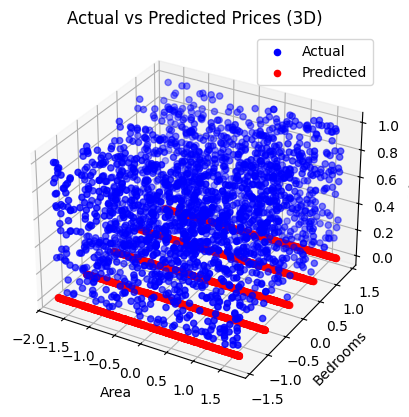

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, color='blue', label='Actual')
ax.scatter(x[:, 0], x[:, 1], y_pred, color='red', label='Predicted')

ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.title('Actual vs Predicted Prices (3D)')
plt.legend()
plt.show()


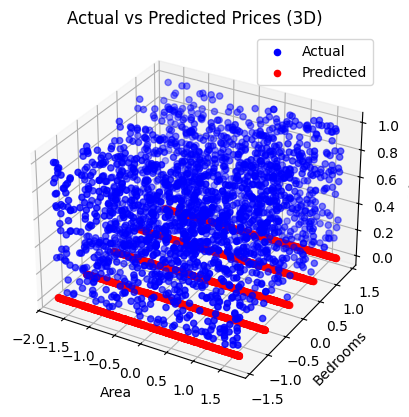

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, color='blue', label='Actual')
ax.scatter(x[:, 0], x[:, 1], y_pred, color='red', label='Predicted')

ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.title('Actual vs Predicted Prices (3D)')
plt.legend()
plt.show()
